In [1]:
import numpy as np


np.random.seed(42)
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from plotting import plot

In [2]:
dataset = load_iris()

x = dataset.data[:, :2]
y = dataset.target

In [3]:
class KMeans:
    def __init__(self, n_clusters: int = 8, max_iter: int = 3_000) -> None:
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids_ = None

    def fit(self, x: np.ndarray) -> None:
        rand_idxs = np.random.permutation(len(x))[: self.n_clusters]
        self.centroids_ = x[rand_idxs]
        for _ in range(self.max_iter):
            self.assignment = {i: [] for i in range(self.n_clusters)}
            # Step 1: Assignment
            for xi in x:
                distance_to_centroids = np.array(
                    [
                        np.linalg.norm(xi - centroid)
                        for centroid in self.centroids_
                    ]
                )
                closest_centroid_idx = np.argmin(distance_to_centroids)
                self.assignment[closest_centroid_idx].append(xi)
            # Step 2: Update
            for cluster_idx in range(self.n_clusters):
                if len(self.assignment[cluster_idx]) > 0:
                    self.centroids_[cluster_idx] = np.mean(
                        self.assignment[cluster_idx], axis=0
                    )

    def predict(self, x: np.ndarray) -> np.ndarray:
        y_pred = np.zeros(shape=(len(x),))
        for idx, xi in enumerate(x):
            distance_to_centroids = np.array(
                [np.linalg.norm(xi - centroid) for centroid in self.centroids_]
            )
            closest_centroid_idx = np.argmin(distance_to_centroids)
            y_pred[idx] = closest_centroid_idx
        return y_pred

    def score(self, x: np.ndarray) -> None:
        pass

In [4]:
kmeans = KMeans(n_clusters=3, max_iter=1_000)
kmeans.fit(x)
y_pred = kmeans.predict(x).astype(int)

print(kmeans.centroids_)
print(y_pred)

[[5.8        2.7       ]
 [5.00392157 3.40980392]
 [6.82391304 3.07826087]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 1 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


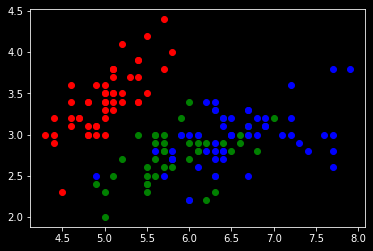

In [5]:
colors = ["red", "green", "blue"]

for idx, point in enumerate(x):
    plt.scatter(point[0], point[1], color=colors[y[idx]])
plt.show()

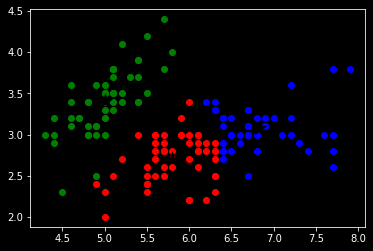

In [6]:
colors = ["red", "green", "blue"]

for idx, point in enumerate(x):
    plt.scatter(point[0], point[1], color=colors[y_pred[idx]], marker="o")
for centroid in kmeans.centroids_:
    plt.scatter(centroid[0], centroid[1], color="black", marker="*", s=200)
plt.show()

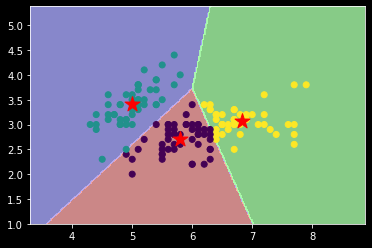

In [7]:
plot(x, y, y_pred, kmeans.centroids_, kmeans)